In [2]:
import time
import pandas as pd
import numpy as np
from ANN_Class import *
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("usps_digit_recognizer.csv")
df = df.loc[:, (df != 0).any(axis=0)]
Train = int(df.shape[0] * 0.6)
Validate = int(df.shape[0] * 0.2)
Test = int(df.shape[0] - Train - Validate)

Train_Model =  df[:Train:]
Validate_Model = df[Train:Validate + Train:]
Test_Model = df[Validate + Train::]


In [4]:
y = Train_Model["label"]
#y.head()
y2 = Validate_Model["label"]
y3 = Test_Model["label"]

In [5]:
Y = pd.get_dummies(y)
Y2 = pd.get_dummies(y2)
Y3 = pd.get_dummies(y3)

Y = np.array(Y)
Y2 = np.array(Y2)
Y3 = np.array(Y3)

In [6]:
x = Train_Model.drop(['label'], axis=1)
x2 = Validate_Model.drop(['label'], axis=1)
x3 = Test_Model.drop(['label'], axis=1)

In [7]:
x = x/255
x2 = x2/255
x3 = x3/255

x = x.values
#x2 = x2.values

In [7]:
temp1 = ANN_Classification([50,50],Fs = [sigmoid,tanh])

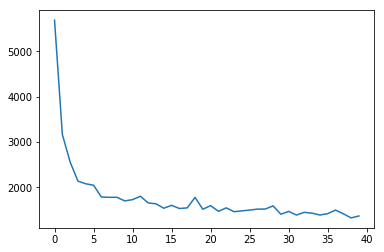

In [8]:
temp1.Fit(x,Y,eta = 1e-3, epochs=1000,lambda1 = 0.02,lambda2 = 0.01,show_curve = True)

In [9]:
temp1.accuracy()

0.9866666666666667

In [10]:
temp1.predict(x2)

In [11]:
temp1.accuracy_P(Y2)

0.965

In [12]:
temp1.predict(x3)
temp1.accuracy_P(Y3)

0.9695238095238096

ACC for validation is: 0.9284523809523809, lambda1 is: 0.0, lambda2 is 0.0
ACC for validation is: 0.9732142857142857, lambda1 is: 0.0, lambda2 is 0.01
ACC for validation is: 0.9727380952380953, lambda1 is: 0.0, lambda2 is 0.02
ACC for validation is: 0.9721428571428572, lambda1 is: 0.0, lambda2 is 0.03
ACC for validation is: 0.9719047619047619, lambda1 is: 0.0, lambda2 is 0.04
ACC for validation is: 0.9726190476190476, lambda1 is: 0.0, lambda2 is 0.05
ACC for validation is: 0.9678571428571429, lambda1 is: 0.0, lambda2 is 0.06
ACC for validation is: 0.9701190476190477, lambda1 is: 0.0, lambda2 is 0.07
ACC for validation is: 0.9683333333333334, lambda1 is: 0.0, lambda2 is 0.08
ACC for validation is: 0.9673809523809523, lambda1 is: 0.0, lambda2 is 0.09
ACC for validation is: 0.9682142857142857, lambda1 is: 0.0, lambda2 is 0.1
ACC for validation is: 0.965, lambda1 is: 0.01, lambda2 is 0.0
ACC for validation is: 0.9708333333333333, lambda1 is: 0.01, lambda2 is 0.01
ACC for validation is: 0.9

KeyboardInterrupt: 

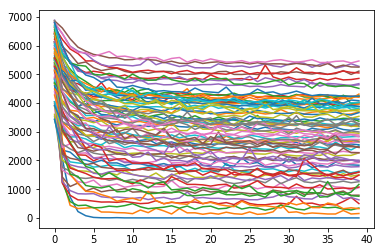

In [15]:
best = []
for i in range (11):
    for j in range (11):
        temp1 = ANN_Classification([50,50],Fs = [sigmoid,tanh])
        temp1.Fit(x,Y,eta = 1e-3, epochs=1000,lambda1 = i*0.01,lambda2 = j*0.01,show_curve = True)
        temp1.predict(x2)
        P_V = temp1.accuracy_P(Y2)
        best.append((P_V,i*0.01,j*0.01))
        print ("ACC for validation is: {}, lambda1 is: {}, lambda2 is {}".format(P_V,i*0.01,j*0.01))
        

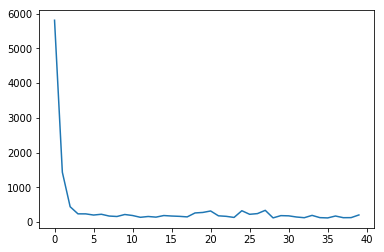

In [8]:
temp1 = ANN_Classification([50,50],Fs = [sigmoid,tanh])
temp1.Fit(x,Y,eta = 1e-3, epochs=1000,lambda1 = 0,lambda2 = 0.01,show_curve = True)

In [9]:
temp1.accuracy()

0.9992063492063492

In [10]:
temp1.predict(x2)

In [11]:
temp1.accuracy_P(Y2)

0.9698809523809524

In [12]:
temp1.predict(x3)
temp1.accuracy_P(Y3)

0.9711904761904762

In [32]:
temp2 = temp1.P_v.argmax(axis = 1)

In [33]:
temp = Y3.argmax(axis =1)

In [34]:
target =pd.DataFrame(temp, columns=['target'])
prediction = pd.DataFrame(temp2, columns=['prediction'])

In [36]:
 result = pd.concat([prediction,target ], axis=1, join='inner')

In [57]:
dif = result["prediction"] != result["target"]
comp = result.where(dif)

In [63]:
comp.dropna(inplace = True)

In [105]:
def plot(group,column,plot):
    ax=plt.figure(figsize=(12,6))
    zero.groupby(group)[column].sum().sort_values(ascending=False).plot(plot)

In [99]:
zero = comp.where(comp['target'] == 0).dropna()

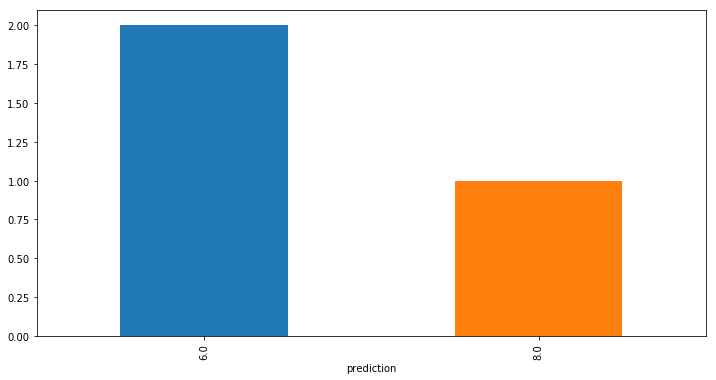

In [131]:
ax=plt.figure(figsize=(12,6))
zero.groupby('prediction')['prediction'].count().sort_values(ascending=False).plot('bar')

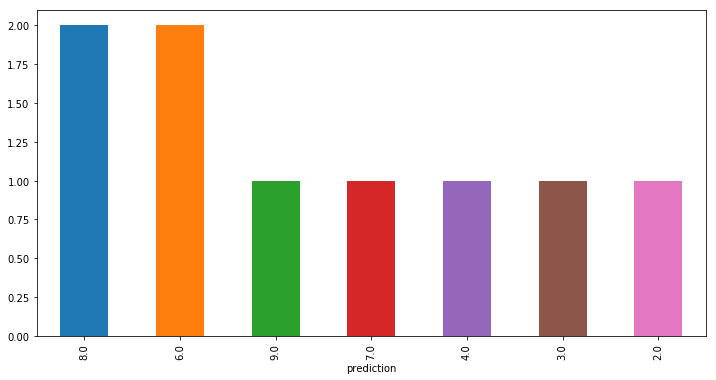

In [132]:
one = comp.where(comp['target'] == 1).dropna()
ax=plt.figure(figsize=(12,6))
one.groupby('prediction')['prediction'].count().sort_values(ascending=False).plot('bar')

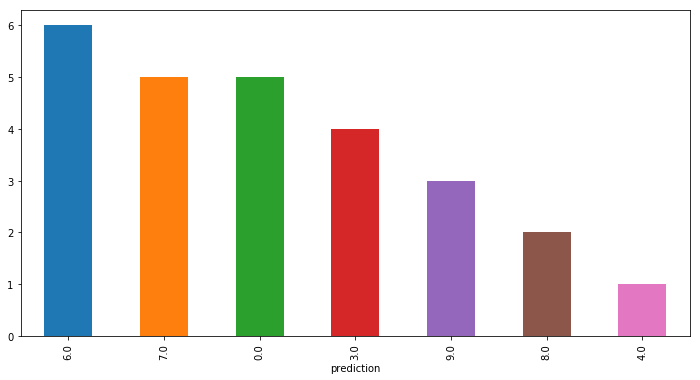

In [133]:
two = comp.where(comp['target'] == 2).dropna()
ax=plt.figure(figsize=(12,6))
two.groupby('prediction')['prediction'].count().sort_values(ascending=False).plot('bar')

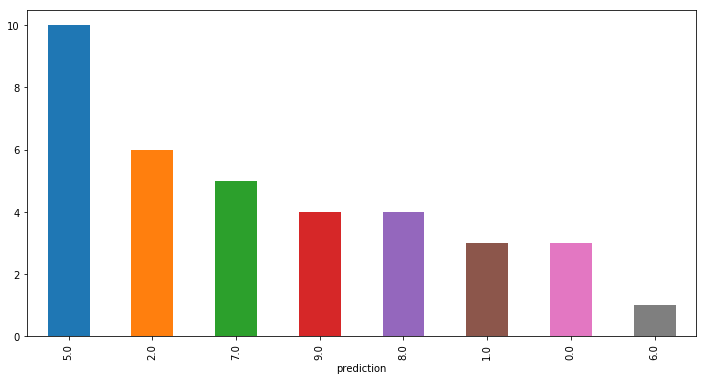

In [134]:
three = comp.where(comp['target'] == 3).dropna()
ax=plt.figure(figsize=(12,6))
three.groupby('prediction')['prediction'].count().sort_values(ascending=False).plot('bar')

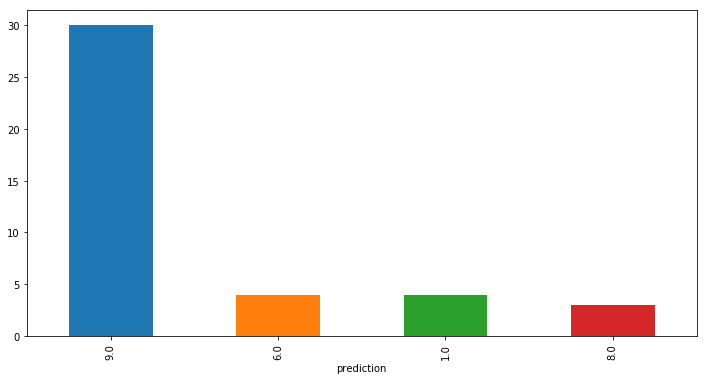

In [135]:
four = comp.where(comp['target'] == 4).dropna()
ax=plt.figure(figsize=(12,6))
four.groupby('prediction')['prediction'].count().sort_values(ascending=False).plot('bar')

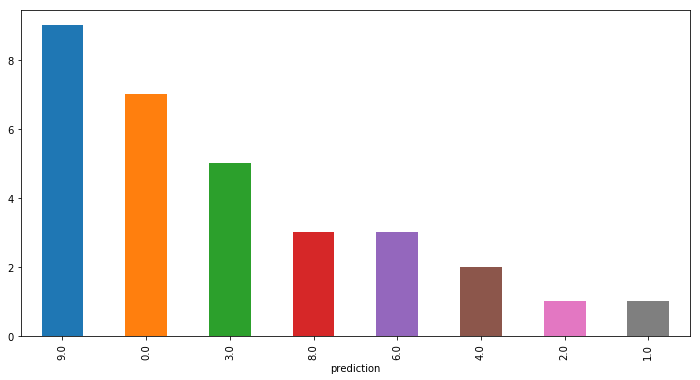

In [136]:
five = comp.where(comp['target'] == 5).dropna()
ax=plt.figure(figsize=(12,6))
five.groupby('prediction')['prediction'].count().sort_values(ascending=False).plot('bar')

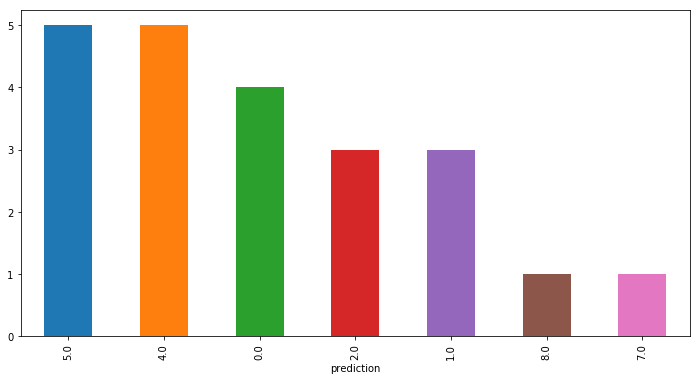

In [137]:
six = comp.where(comp['target'] == 6).dropna()
ax=plt.figure(figsize=(12,6))
six.groupby('prediction')['prediction'].count().sort_values(ascending=False).plot('bar')

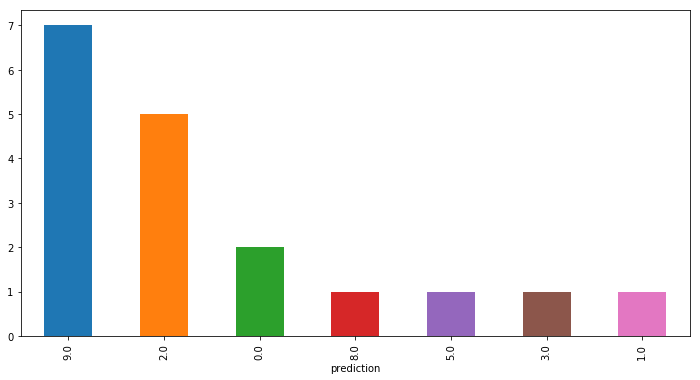

In [138]:
seven = comp.where(comp['target'] == 7).dropna()
ax=plt.figure(figsize=(12,6))
seven.groupby('prediction')['prediction'].count().sort_values(ascending=False).plot('bar')

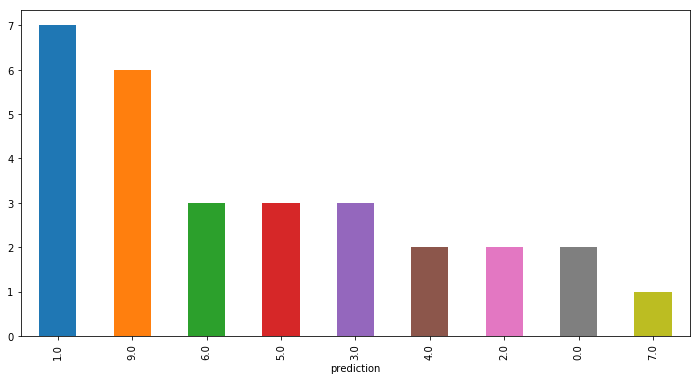

In [139]:
eight = comp.where(comp['target'] == 8).dropna()
ax=plt.figure(figsize=(12,6))
eight.groupby('prediction')['prediction'].count().sort_values(ascending=False).plot('bar')

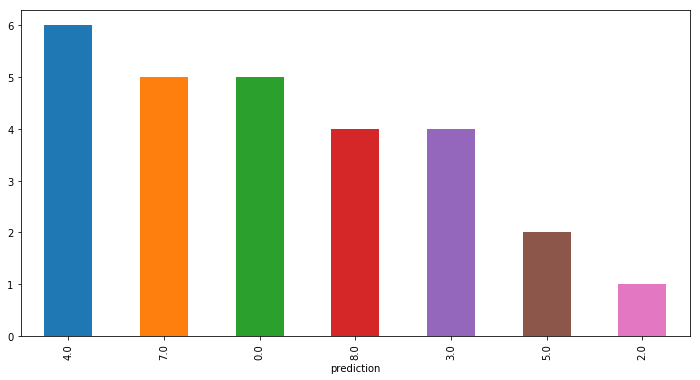

In [140]:
nine = comp.where(comp['target'] == 9).dropna()
ax=plt.figure(figsize=(12,6))
nine.groupby('prediction')['prediction'].count().sort_values(ascending=False).plot('bar')

In [126]:
comp.shape

(242, 2)

In [130]:
zero

,prediction,target
6178,6.0,0.0
6281,6.0,0.0
7636,8.0,0.0


In [143]:
y3.shape

(8400,)